# MLP model

MLP model

----------------------------------------------------------
----------------------------------------------------------
Load train data......

Load test data......
----------------------------------------------------------
Start MLP model....

Training the model ...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



Loading the saved MLP model...

Loaded saved model

----------------------------------------------------------
Predicting test data ...

Displaying Result
----------------------------------------------------------
Confusion matrix without threshold:
[[18157  2048]
 [12382 28617]]

Accuracy: 0.764231096006797
Precision: 0.9332137616174793
Recall: 0.6979926339666821
F1 Score: 0.7986436704621568

TPR: 0.6979926339666821
FNR: 0.3020073660333179
TNR: 0.8986389507547636
FPR: 0.10136104924523633

----------------------------------------------------------


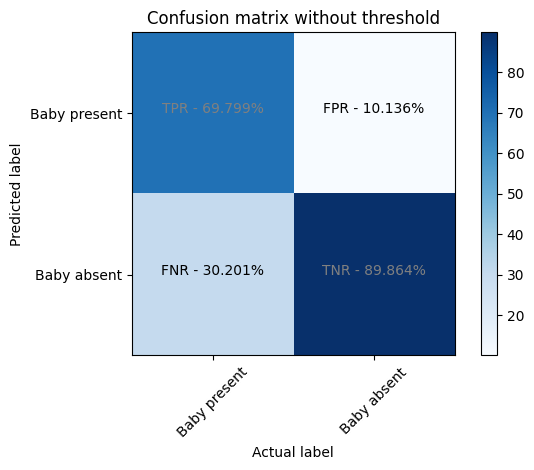

----------------------------------------------------------

Confusion matrix with threshold:
[[17389  2816]
 [ 3786 37213]]

Accuracy: 0.8921312332527286
Precision: 0.9296510030228085
Recall: 0.9076562842996171
F1 Score: 0.9185219923976897

TPR: 0.9076562842996171
FNR: 0.09234371570038294
TNR: 0.8606285572878001
FPR: 0.13937144271219995

----------------------------------------------------------


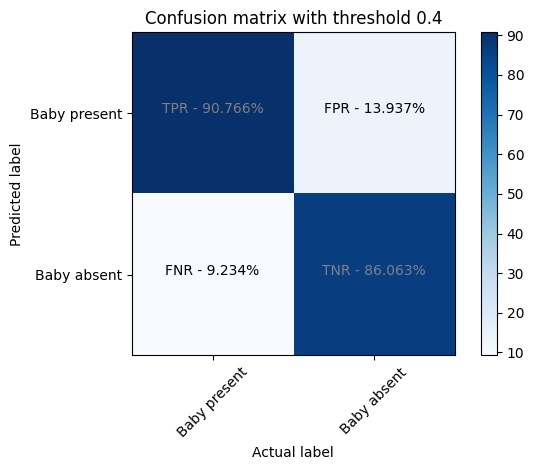

MLP model saved as /Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/saved_models/mlp_model.joblib


In [1]:
#import all the necessary packages
import numpy as np
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import itertools
from joblib import dump, load

print("MLP model")
print("")
print("----------------------------------------------------------")
print("----------------------------------------------------------")
# Load the dataset
print("Load train data......")
# Load the training data
train_data = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/train.npy') 
train_label = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/train_label.npy')

print("")
print("Load test data......")
# Load the test data based on the test type
#test_1 is for testing with baby present and absent
#test_data = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_1.npy')
#test_label = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_label_1.npy')

#test_2 is for testing with baby present(sunscreen and scarf) and absent while the model is trained without sunscreen and scarf
#test_data = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_2.npy')
#test_label = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_label_2.npy')

#test_all is for testing with baby present, sunscreen, scarf and absent while the model is trained without sunscreen and scarf
test_data = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_all.npy')
test_label = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_label_all.npy')

print("----------------------------------------------------------")

# Define the MLP model
print("Start MLP model....")
mlp_model = MLPClassifier(hidden_layer_sizes=(256,), max_iter=1000000, activation='relu')  # You can adjust hidden_layer_sizes and max_iter as needed
print("")

# Train the MLP model
print("Training the model ...")
#mlp_model.fit(train_data, train_label)
print("")

# Load the saved model with complete file path
model_file = '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/saved_models/mlp_model.joblib'
print("Loading the saved MLP model...")
mlp_model = load(model_file)
print("")
print("Loaded saved model")
print("")

print("----------------------------------------------------------")
print("Predicting test data ...")
# Test the MLP model
test_pred_probs = (mlp_model.predict_proba(test_data)[:, 1] + 0.5).astype(int)  # Probability of positive class

# Convert probabilities to binary predictions using optimal_threshold
test_pred_probs1 = mlp_model.predict_proba(test_data)[:, 1]  # Probability of positive class
optimal_threshold = 0.4  # You can adjust this threshold if needed
test_pred = (test_pred_probs1 > optimal_threshold).astype(int)


print("")
print("Displaying Result")
print("----------------------------------------------------------")

# Calculate metrics
conf_mat = metrics.confusion_matrix(test_label, test_pred_probs)
accuracy = metrics.accuracy_score(test_label, test_pred_probs)
precision = metrics.precision_score(test_label, test_pred_probs)
recall = metrics.recall_score(test_label, test_pred_probs)
f1_score = metrics.f1_score(test_label, test_pred_probs)

print('Confusion matrix without threshold:')
print(conf_mat)
print("")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print("")

# Calculate TPR, FNR, TNR, FPR
TN, FP, FN, TP = conf_mat.ravel()
# Calculate the TPR, TNR, FNR, and FPR
TPR = TP / (TP + FN)  # True positive rate
TNR = TN / (TN + FP)  # True negative rate
FNR = FN / (FN + TP)  # False negative rate
FPR = FP / (FP + TN)  # False positive rate
cm = np.array([[TPR * 100, FPR * 100], [FNR * 100, TNR * 100]])

print('TPR:', TPR)
print('FNR:', FNR)
print('TNR:', TNR)
print('FPR:', FPR)
print("")

print("----------------------------------------------------------")

# Plot the confusion matrix
class_names = ['Baby present', 'Baby absent']
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix without threshold')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if i == 0 and j == 0:
        labels = 'TPR - '
    elif i == 0 and j == 1:
        labels = 'FPR - '
    elif i == 1 and j == 0:
        labels = 'FNR - '
    elif i == 1 and j == 1:
        labels = 'TNR - '
    texts = round((cm[i, j]), 3)
    plt.text(j, i, labels + str(texts) + '%',
             horizontalalignment="center",
             color="gray" if cm[i, j] > thresh else "black")
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
plt.tight_layout()
plt.show() 

print("----------------------------------------------------------")

# Calculate metrics
conf_mat1 = metrics.confusion_matrix(test_label, test_pred)
accuracy1 = metrics.accuracy_score(test_label, test_pred)
precision1 = metrics.precision_score(test_label, test_pred)
recall1 = metrics.recall_score(test_label, test_pred)
f1_score1 = metrics.f1_score(test_label, test_pred)
print("")
print('Confusion matrix with threshold:')
print(conf_mat1)
print("")
print('Accuracy:', accuracy1)
print('Precision:', precision1)
print('Recall:', recall1)
print('F1 Score:', f1_score1)
print("")

# Calculate TPR, FNR, TNR, FPR
TN1, FP1, FN1, TP1 = conf_mat1.ravel()
# Calculate the TPR, TNR, FNR, and FPR
TPR1 = TP1 / (TP1 + FN1) #rue positive rate
TNR1 = TN1 / (TN1 + FP1) #rue negative rate
FNR1 = FN1 / (FN1 + TP1) #false negative rate
FPR1 = FP1 / (FP1 + TN1) #false positive rate
cm1= np.array([[TPR1*100, FPR1*100], [FNR1*100, TNR1*100]])

print('TPR:', TPR1)
print('FNR:', FNR1)
print('TNR:', TNR1)
print('FPR:', FPR1)
print("")

print("----------------------------------------------------------")

# Plot the confusion matrix
class_names = ['Baby present', 'Baby absent']
plt2.imshow(cm1, interpolation='nearest', cmap=plt2.cm.Blues)
plt2.title('Confusion matrix with threshold ' + str(optimal_threshold))
plt2.colorbar()
tick_marks1 = np.arange(len(class_names))
plt2.xticks(tick_marks1, class_names, rotation=45)
plt2.yticks(tick_marks1, class_names)
fmt = 'd'
thresh = cm1.max() / 2.
for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if i==0 and j==0:
        labels= 'TPR - '
    elif i==0 and j==1:
        labels= 'FPR - '
    elif i==1 and j==0:
        labels= 'FNR - '
    elif i==1 and j==1:
        labels= 'TNR - '
    texts = round((cm1[i,j]), 3)
    plt.text(j, i, labels + str(texts) + '%',
             horizontalalignment="center",
             color="gray" if cm1[i, j] > thresh else "black")
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
plt.tight_layout()
plt.show()

# Save the trained model with complete file path
model_file = '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/saved_models/mlp_model.joblib'
#dump(mlp_model, model_file)
print(f"MLP model saved as {model_file}")